In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Load Data
We are going to use ‘Mall_Customers.csv’ CSV file
Dataset contains 5 columns CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [2]:
mdf=pd.read_csv(r"C:\Users\ibast\Downloads\Mall customer csv\Mall_Customers.csv")

In [3]:
mdf.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
mdf.shape

(200, 5)

In [32]:
mdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.515000
std,57.879185,13.969007,26.264721,25.823522,1.569103
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


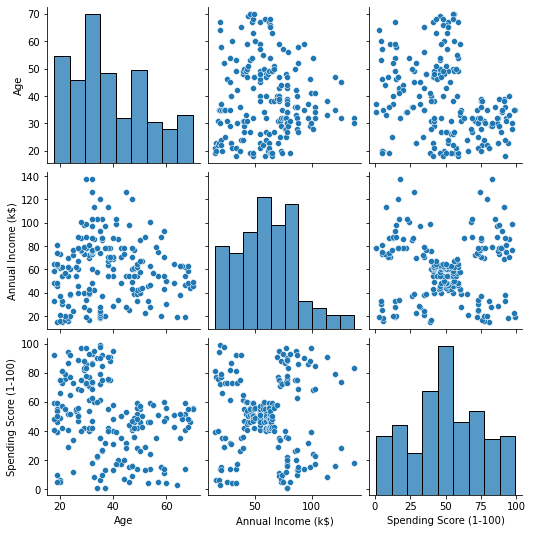

In [38]:
import seaborn
seaborn.pairplot(mdf[["Age",'Annual Income (k$)','Spending Score (1-100)']])

In [39]:
import sklearn.cluster as cluster

In [43]:
kmeans=cluster.KMeans(n_clusters=5)

In [46]:
kmeans=kmeans.fit(mdf[["Age",'Annual Income (k$)']])

In [50]:
kmeans.cluster_centers_

array([[ 29.53658537,  27.24390244],
       [ 38.25862069,  78.15517241],
       [ 56.62      ,  48.48      ],
       [ 25.06451613,  59.48387097],
       [ 36.6       , 109.7       ]])

In [ ]:
mdf

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

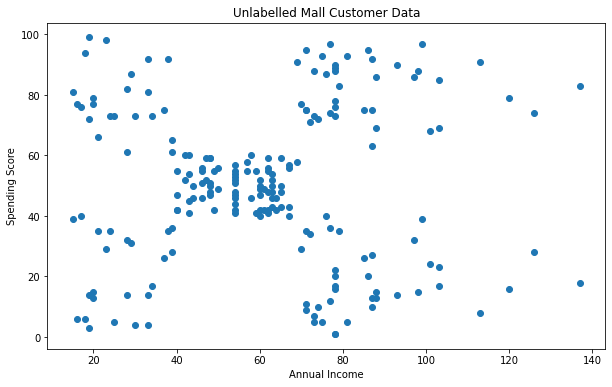

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(mdf['Annual Income (k$)'],mdf['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

CAN CHANGE LONG COLUMNS NAME 
mdf.rename(columns={"Gender":"gender","Annualincome":"income"})  like this 

In [10]:
# Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use
X = mdf.iloc[:, [3,4]].values
X[:5] # Show first 5 records only

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)


Choosing The Number of Clusters

By visual inspection of above scatter plot, we can identify 5 possible clusters. But since there is no other information available its very difficult say it with 100% confidence. So lets try to verify this with Elbow method technique.
Elbow Method

    Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
    We will use 'random' initialization method for this study.
    Note that Sklearn K-Means algorithm also have ‘k-means++’ initialization method. It selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.



C:\Users\ibast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


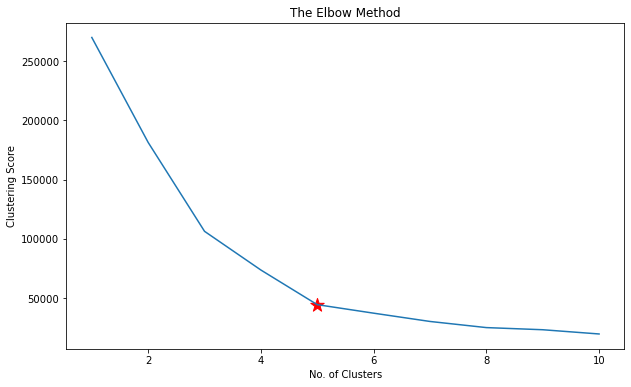

In [11]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

Compute K-Means Clustering

Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [12]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [13]:
mdf['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', mdf['Cluster'].value_counts())
mdf

Number of data points in each cluster= 
 0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1



Visualization

Let's plot the centroid and cluster with different colors to visualize, how K-Means algorithm has grouped the data.


Text(0.5, 1.0, 'Customer Clusters')

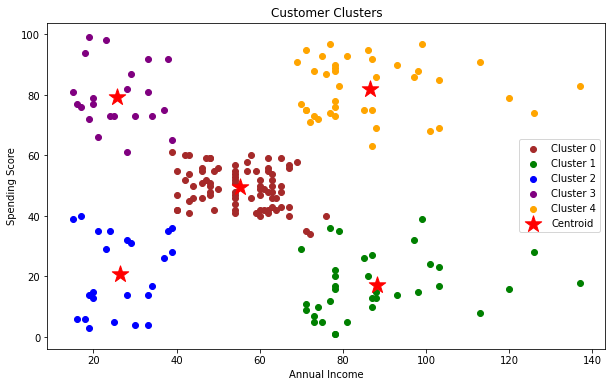

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [30]:
def plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color):
    c_x = [] # To store centroid X coordinated
    c_y=[]   # To store the centroid Y coordinates
    for i in range(0, n_clusters):
        cluster_index = 0
        for j in range(0, centroid_sets):
            c_x = np.append(c_x, centroid_history[:,0][i + cluster_index])
            c_y = np.append(c_y, centroid_history[:,1][i + cluster_index])
            cluster_index = cluster_index + n_clusters
            # if there are 5 clusters then first set contains initial cluster cordinates and then k_means loop will keep appending new cluster coordinates for each iteration
        
        plt.plot(c_x, c_y, c= cluster_color['c_' + str(i)], linestyle='--')
        
        # Reset coordinate arrays to avoid continuous lines
        c_x = []
        c_y=[]

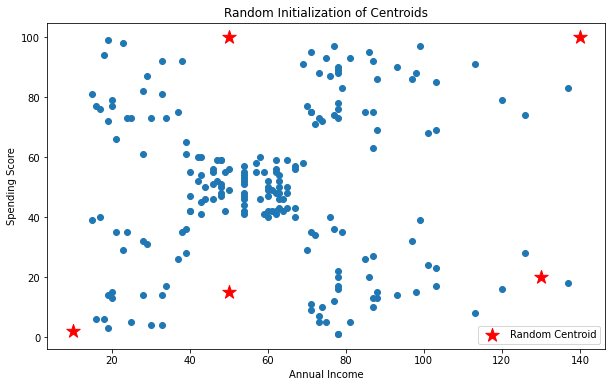

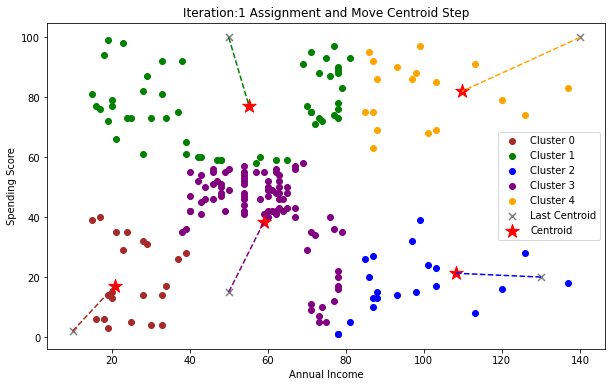

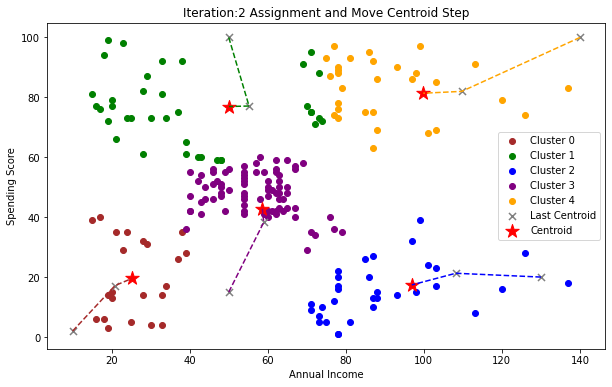

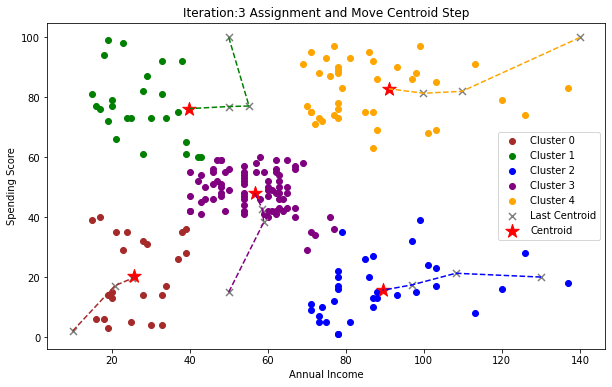

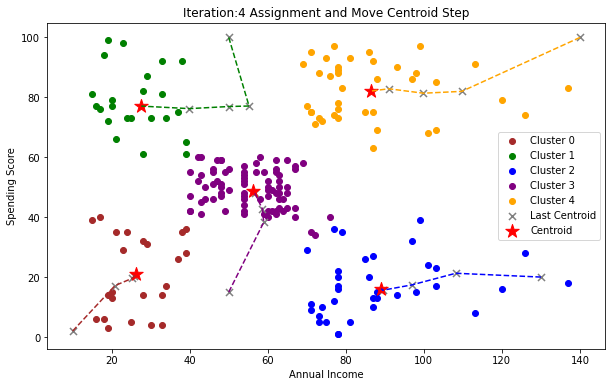

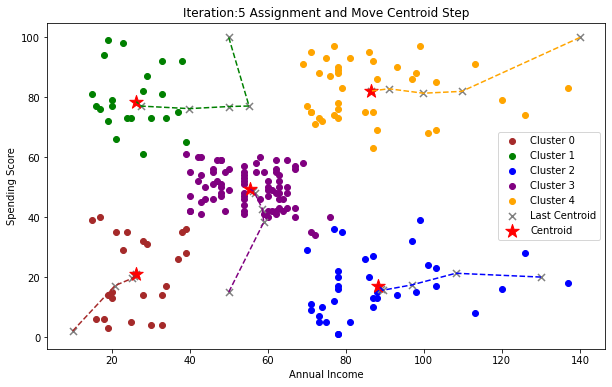

In [31]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(mdf['Annual Income (k$)'],mdf['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array
    
    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4') 
    
    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')
    
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')
    
    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)
    
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')
    
    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)